In [4]:
import pandas as pd

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url)

# Keep only the required columns
df_filtered = df[['num-of-cylinders', 'engine-size', 'highway-mpg', 'price']].copy()

# Rename column
df_filtered.rename(columns={'num-of-cylinders': 'cylinders'}, inplace=True)

# Convert cylinder text to integers
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}
df_filtered['cylinders'] = df_filtered['cylinders'].map(cylinder_map)

# Export to CSV
df_filtered.to_csv("filtered_automobile_data.csv", index=False)
print("✅ Exported: filtered_automobile_data.csv")

✅ Exported: filtered_automobile_data.csv


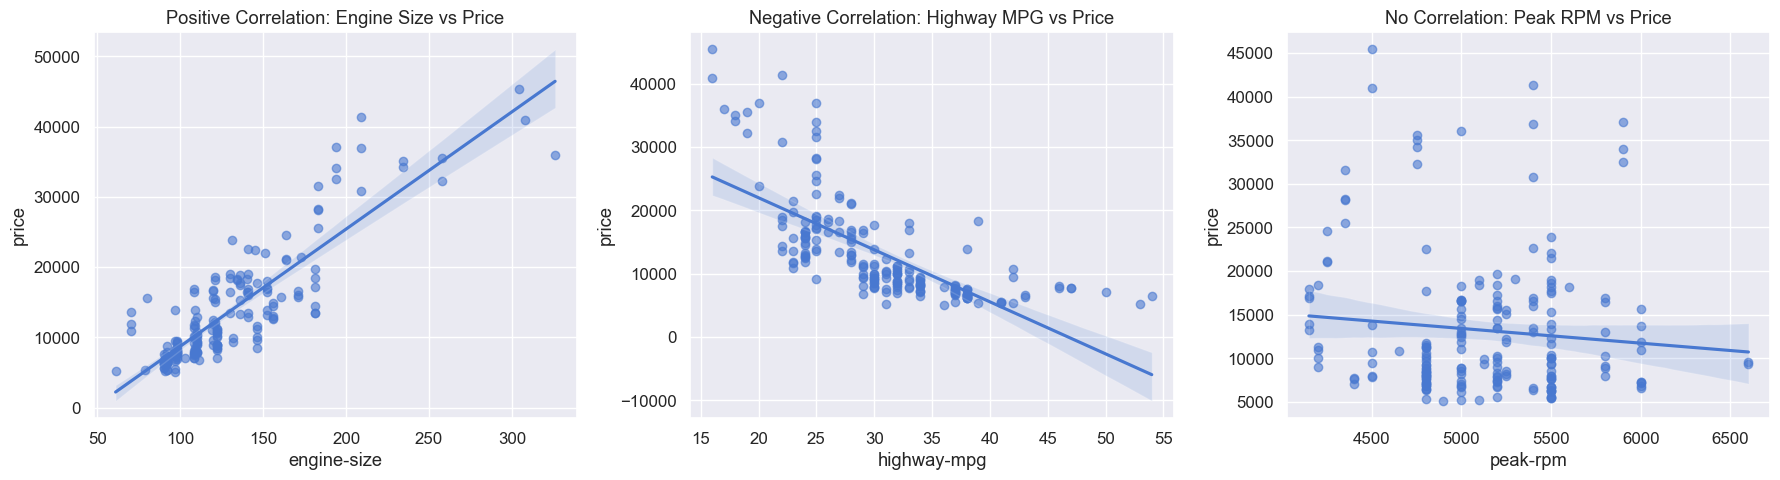

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(url)

# Convert relevant columns to numeric
for col in ['price', 'engine-size', 'highway-mpg', 'peak-rpm']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df_clean = df[['engine-size', 'highway-mpg', 'peak-rpm', 'price']].dropna()

# Set plot style
sns.set(style="darkgrid", palette="muted", font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Positive correlation
sns.regplot(x='engine-size', y='price', data=df_clean, ax=axes[0], scatter_kws={'alpha':0.6})
axes[0].set_title('Positive Correlation: Engine Size vs Price')

# Negative correlation
sns.regplot(x='highway-mpg', y='price', data=df_clean, ax=axes[1], scatter_kws={'alpha':0.6})
axes[1].set_title('Negative Correlation: Highway MPG vs Price')

# No correlation
sns.regplot(x='peak-rpm', y='price', data=df_clean, ax=axes[2], scatter_kws={'alpha':0.6})
axes[2].set_title('No Correlation: Peak RPM vs Price')

plt.tight_layout()
plt.show()

